In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
from codecarbon import EmissionsTracker
import time

ModuleNotFoundError: No module named 'codecarbon'

[3.34589575 3.00560118 3.8462361  ... 7.93660591 7.47515931 7.33632985]


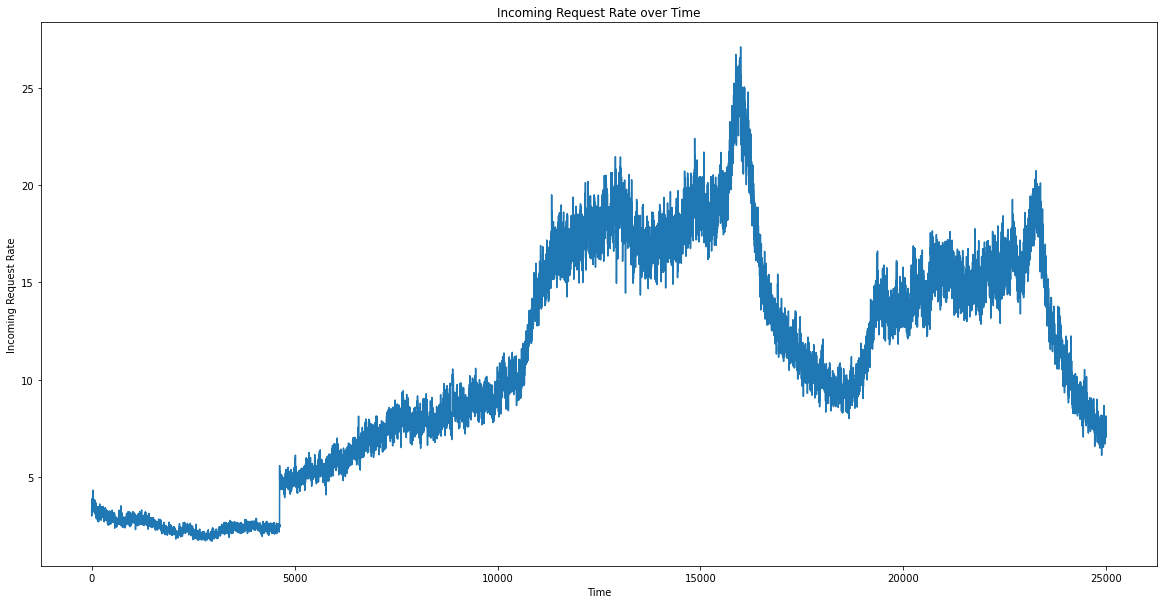

In [2]:

# Read in the inter-arrival times from the CSV file
file_path = 'resampled_scaled_inter_arrivals.csv'

try:
    with open(file_path, 'r') as f:
        reader = csv.reader(f)
        inter_arrivals = [float(row[0].strip()) for row in reader if float(row[0].strip()) != 0] # Exclude zero inter-arrival times
except FileNotFoundError:
    print("File not found. Please check the file path.")
    exit()

# Convert inter-arrival times to arrival rates
arrival_rates = 1.0 / np.array(inter_arrivals)

print(arrival_rates)

# Plot arrival rates as a time series
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(np.arange(len(arrival_rates)), arrival_rates)
ax.set_xlabel('Time')
ax.set_ylabel('Incoming Request Rate')
ax.set_title('Incoming Request Rate over Time')
plt.show()

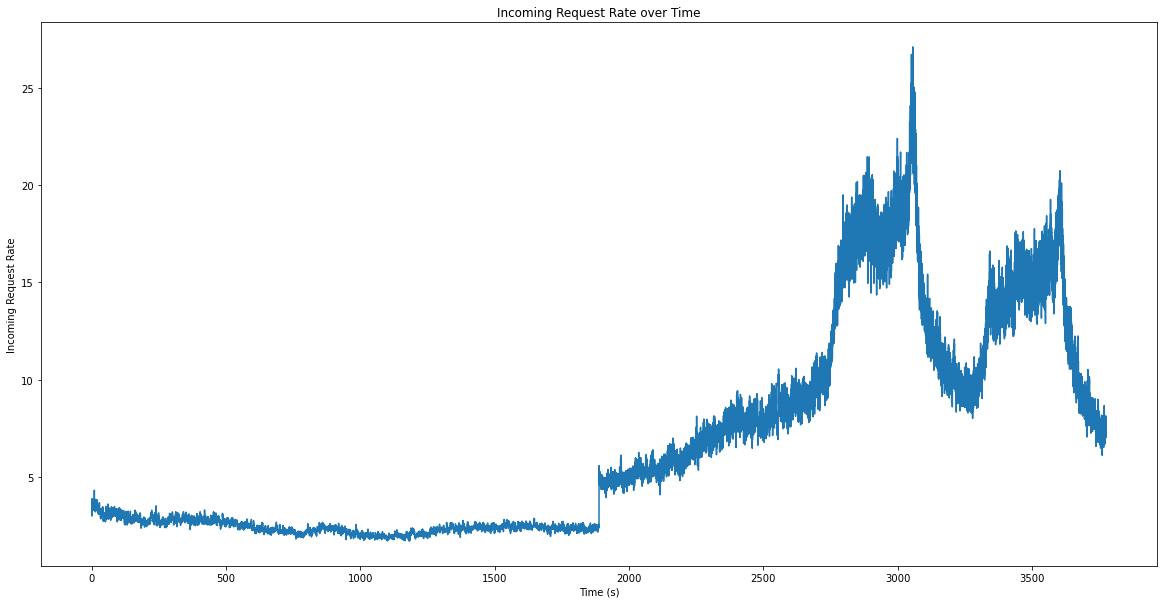

In [7]:
# Read in the inter-arrival times from the CSV file
file_path = 'resampled_scaled_inter_arrivals.csv'

try:
    with open(file_path, 'r') as f:
        reader = csv.reader(f)
        inter_arrivals = [float(row[0].strip()) for row in reader if float(row[0].strip()) != 0] # Exclude zero inter-arrival times
except FileNotFoundError:
    print("File not found. Please check the file path.")
    exit()

# Convert inter-arrival times to arrival rates
arrival_rates = 1.0 / np.array(inter_arrivals)

# Calculate absolute arrival times
arrival_times = np.cumsum(inter_arrivals)

# Plot arrival rates against absolute arrival times
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(arrival_times, arrival_rates)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Incoming Request Rate')
ax.set_title('Incoming Request Rate over Time')
plt.show()

In [15]:
# from PIL import Image as mag
# import os

from PIL import Image
import io
import sys

# Open the image file
image = Image.open("IMAGES/A_batch1_bin2_000000010188.jpg")

# # Set the desired compression quality (0-100)

# # for i in range(10, 110, 10):
# compression_quality = 100

# # Save the image with compression
# image.save(f"compressed_image_{100}.jpg", optimize=True, quality=compression_quality)
with open("IMAGES_1/A_batch1_bin2_000000077804.jpg", 'rb') as file:
    image_bytes = file.read()

img = Image.open(io.BytesIO(image_bytes))

# Compress the image (adjust quality as needed)
compressed_image = io.BytesIO()
img.save(compressed_image, format="JPEG", quality=97)

# Convert compressed image to bytes
compressed_image_bytes = compressed_image.getvalue()

# image_file = io.BytesIO(compressed_image_bytes)
# file_size = len(image_file.getvalue())
file_size = sys.getsizeof(compressed_image_bytes)

file_size/1000


131.503

In [2]:
df = pd.read_csv("log.csv")

In [3]:
df.head()
# Emissions: 5.089033608816157e-07 kg
# 4.021418281188919e-07 kg
# 4.639522892414241e-07 kg

,total_processed,input_rate,image_quality,current_model,avg_conf,current_boxes,emissions,emissions_rate,current_cpu,cpu_power,cpu_energy,ram_power,ram_energy,energy_consumed,current_time,start_time,absolute_time
0,2,3.846236,100,yolov5n,0.507850,6,5.312362e-07,0.000007,65.7,42.5,9.185177e-07,5.742959,1.236284e-07,0.000001,0.047518,9.412312,0.162132
1,3,3.523685,100,yolov5n,0.624531,8,5.312362e-07,0.000003,60.3,42.5,9.185177e-07,5.742959,1.236284e-07,0.000001,0.054461,9.178340,0.261329
2,4,3.609265,100,yolov5n,0.547537,13,5.312362e-07,0.000002,65.1,42.5,9.185177e-07,5.742959,1.236284e-07,0.000001,0.058586,9.034455,0.374430
3,5,3.473911,100,yolov5n,0.437539,20,5.312362e-07,0.000001,61.3,42.5,9.185177e-07,5.742959,1.236284e-07,0.000001,0.069705,8.838340,0.475232
4,6,3.895552,100,yolov5n,0.000000,0,5.312362e-07,0.000001,79.6,42.5,9.185177e-07,5.742959,1.236284e-07,0.000001,0.072420,8.697211,0.608240


In [3]:
tracker = EmissionsTracker()

[codecarbon INFO @ 15:20:06] [setup] RAM Tracking...
[codecarbon INFO @ 15:20:06] [setup] GPU Tracking...
[codecarbon INFO @ 15:20:06] No GPU found.
[codecarbon INFO @ 15:20:06] [setup] CPU Tracking...
[codecarbon WARNING @ 15:20:06] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 15:20:08] We saw that you have a 11th Gen Intel(R) Core(TM) i7-11370H @ 3.30GHz but we don't know it. Please contact us.
[codecarbon INFO @ 15:20:08] CPU Model on constant consumption mode: 11th Gen Intel(R) Core(TM) i7-11370H @ 3.30GHz
[codecarbon INFO @ 15:20:08] >>> Tracker's metadata:
[codecarbon INFO @ 15:20:08]   Platform system: Linux-5.15.0-75-generic-x86_64-with-glibc2.31
[codecarbon INFO @ 15:20:08]   Python version: 3.9.12
[codecarbon INFO @ 15:20:08]   CodeCarbon version: 2.2.1
[codecarbon INFO @ 15:20:08]   Available RAM : 15.315 GB
[codecarbon INFO @ 15:20:08]   CPU count: 8
[codecarbon INFO @ 15:20:08]   CPU model: 11th Gen Intel(R) Core(TM) i7-11370H @ 3.30

In [8]:
tracker.start()
time.sleep(5)
tracker.stop()

[codecarbon INFO @ 15:22:22] Energy consumed for RAM : 0.000008 kWh. RAM Power : 5.7429585456848145 W
[codecarbon INFO @ 15:22:22] Energy consumed for all CPUs : 0.000059 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 15:22:22] 0.000067 kWh of electricity used since the beginning.


3.418601138079853e-05

In [10]:
type(tracker.final_emissions_data)

codecarbon.output.EmissionsData

In [13]:
tracker.final_emissions_data = []

In [14]:
tracker.final_emissions_data

[]

In [15]:
tracker.start()
time.sleep(5)
tracker.stop()
tracker.final_emissions_data

[codecarbon WARNING @ 15:23:31] Already started tracking
[codecarbon WARNING @ 15:23:36] Tracker already stopped !


EmissionsData(timestamp='2023-06-26T15:23:36', project_name='codecarbon', run_id='75577676-49b9-46dd-ae62-c471c16e09af', duration=78.84783744812012, emissions=3.418601138079853e-05, emissions_rate=4.335694229190758e-07, cpu_power=42.5, gpu_power=0.0, ram_power=5.7429585456848145, cpu_energy=5.9082244336605074e-05, gpu_energy=0, ram_energy=7.981742806844448e-06, energy_consumed=6.706398714344952e-05, country_name='India', country_iso_code='IND', region='telangana', cloud_provider='', cloud_region='', os='Linux-5.15.0-75-generic-x86_64-with-glibc2.31', python_version='3.9.12', codecarbon_version='2.2.1', cpu_count=8, cpu_model='11th Gen Intel(R) Core(TM) i7-11370H @ 3.30GHz', gpu_count=None, gpu_model=None, longitude=78.4487, latitude=17.411, ram_total_size=15.314556121826172, tracking_mode='machine', on_cloud='N')

In [3]:
import pyRAPL


 You need to install pymongo>=3.9.0 in order to use MongoOutput 


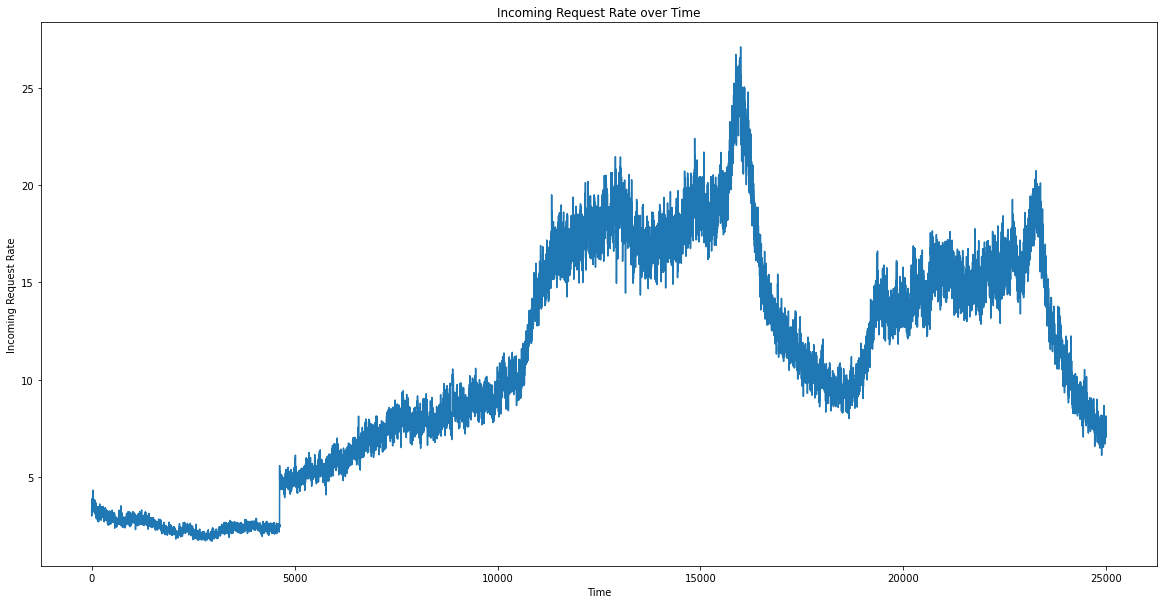

0.168354813


In [4]:

pyRAPL.setup()

measure = pyRAPL.Measurement('bar')
measure.begin()

#  Read in the inter-arrival times from the CSV file
file_path = 'resampled_scaled_inter_arrivals.csv'

try:
    with open(file_path, 'r') as f:
        reader = csv.reader(f)
        inter_arrivals = [float(row[0].strip()) for row in reader if float(row[0].strip()) != 0] # Exclude zero inter-arrival times
except FileNotFoundError:
    print("File not found. Please check the file path.")
    exit()

# Convert inter-arrival times to arrival rates
arrival_rates = 1.0 / np.array(inter_arrivals)

# print(arrival_rates)

# Plot arrival rates as a time series
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(np.arange(len(arrival_rates)), arrival_rates)
ax.set_xlabel('Time')
ax.set_ylabel('Incoming Request Rate')
ax.set_title('Incoming Request Rate over Time')
plt.show()

measure.end()

print(measure.result.duration/1000000)

f = open("log.csv", "a")
f.write(
#     f'{self.total_processed},{self.input_rate[self.total_processed]},{self.image_quality},{self.current_model},{self.avg_conf},{self.current_boxes},{emission_data.emissions},{emission_data.emissions_rate},{self.current_cpu},{emission_data.cpu_power},{emission_data.cpu_energy},{emission_data.ram_power},{emission_data.ram_energy},{emission_data.energy_consumed},{self.current_time},{self.start_time},{self.absolute_time}\n')
        f'{measure.result.duration/1000000}\n')
f.close()

In [11]:
import numpy as np
data1 = np.loadtxt("monitor.csv", dtype='float')  

In [20]:
x = data1/1

In [21]:
type(x)

numpy.float64

In [23]:
type(2*x +1)

numpy.float64

In [10]:
data = pd.read_csv("monitor.csv") 
if data.empty:
    print("empty")

data1 = data.to_numpy()

In [11]:
data1

array([[0.59604815]])

In [3]:
# Generate a function to add two numbers


def add(x, y):

    return x + y

In [10]:
knowledge_df = pd.read_csv("knowledge.csv", header=None)
knowledge_data = knowledge_df.to_numpy()
knowledge = dict()
knowledge["yolov5n"] = [0, knowledge_data[0][1], knowledge_data[0][2], knowledge_data[0][3]]
knowledge["yolov5s"] = [1, knowledge_data[1][1], knowledge_data[1][2], knowledge_data[1][3]]
knowledge["yolov5m"] = [2, knowledge_data[2][1], knowledge_data[2][2], knowledge_data[2][3]]
knowledge["yolov5l"] = [3, knowledge_data[3][1], knowledge_data[3][2], knowledge_data[3][3]]

f = open("knowledge.csv", "w")
writer = csv.writer(f)
writer.writerow(knowledge["yolov5n"])
writer.writerow(knowledge["yolov5s"])
writer.writerow(knowledge["yolov5m"])
writer.writerow(knowledge["yolov5l"])
f.close()